In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
%matplotlib inline

# Import Data
retain only DH, DC, newpara2 and overall hand.

In [27]:
df = pd.read_excel('XY.xlsx')

In [28]:
df.head()

,Sample ID,DH,DC,newpara2,new4mod,Bending,Softness,Weight,Roughness,Stretch,Overall Hand
0,Y1,18.750671,38.727247,280.468589,108.397756,2.666667,2.297619,3.102564,3.130952,2.297619,2.000000
1,Y2,23.541664,49.988518,408.761807,138.290674,2.654762,2.869048,1.512821,2.702381,1.500000,3.107143
2,Y3,14.625450,30.059729,173.812582,81.053673,1.845238,3.488095,1.307692,2.071429,1.261905,3.166667
3,Y5,18.549034,46.885829,363.275230,95.882094,2.666667,1.869048,2.602564,3.428571,4.119048,1.595238
4,Y6,21.169678,53.732329,389.933055,122.267693,2.583333,2.071429,3.102564,3.083333,2.202381,1.916667


In [29]:
to_drop = ['Sample ID','Bending', 'Softness', 'Weight', 'Roughness', 'Stretch']
df.drop(to_drop, axis=1, inplace=True)
# Round overall hand to integer.
df['Overall Hand'] = df['Overall Hand'].map(round)

In [30]:
# Normalize Data
df_params = df.drop('Overall Hand', axis=1)
df_norm = (df_params - df_params.mean()) / (df_params.max() - df_params.min())
df_norm['Overall Hand'] = df['Overall Hand']

In [31]:
df_norm['Overall Hand'].value_counts()

2    16
3    14
4     3
1     2
Name: Overall Hand, dtype: int64

In [46]:
df_norm = df_norm[df_norm['Overall Hand'].isin([2, 3])]

In [47]:
df_norm.head()

,DH,DC,newpara2,new4mod,Overall Hand
0,-0.146233,-0.285071,-0.230030,-0.119329,2
1,0.152816,-0.023001,-0.024036,0.153947,3
2,-0.403725,-0.486779,-0.401282,-0.369303,3
3,-0.158819,-0.095206,-0.097072,-0.233745,2
4,0.004759,0.064124,-0.054268,0.007468,2


In [48]:
df_norm['Overall Hand'].value_counts()

2    16
3    14
Name: Overall Hand, dtype: int64

# Exploratory Data Analysis
- Explore relationships between parameters and overall hand.
- Explore internal relationships parameters.

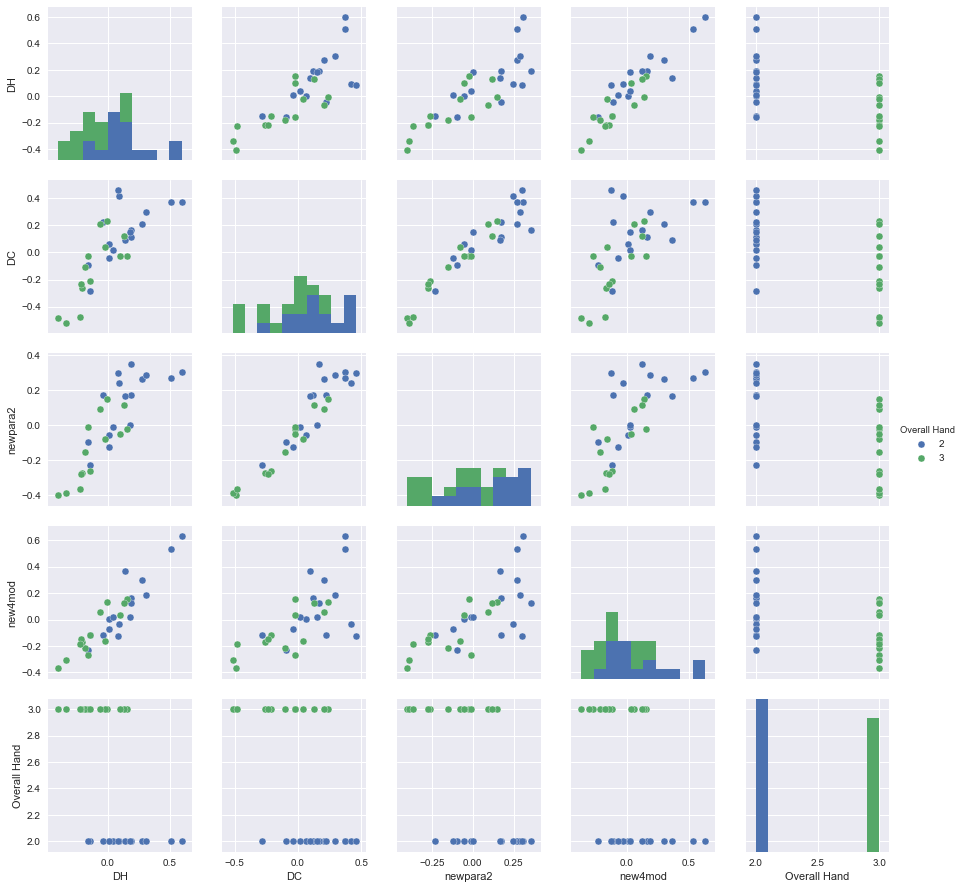

In [49]:
sns.pairplot(df_norm, hue='Overall Hand')

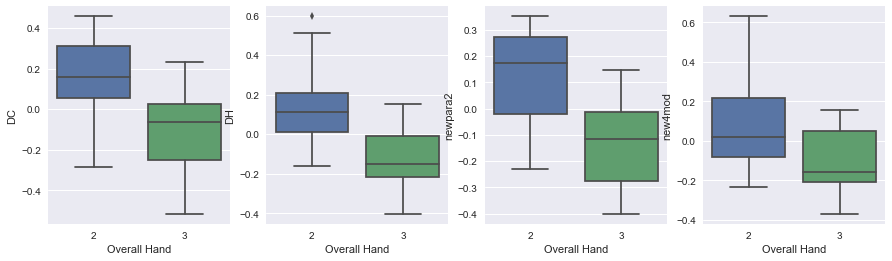

In [53]:
fig = plt.figure(figsize=(15,4))
plt.subplot(141)
sns.boxplot(df_norm['Overall Hand'], df_norm['DC'])
plt.subplot(142)
sns.boxplot(df_norm['Overall Hand'], df_norm['DH'])
plt.subplot(143)
sns.boxplot(df_norm['Overall Hand'], df_norm['newpara2'])
plt.subplot(144)
sns.boxplot(df_norm['Overall Hand'], df_norm['new4mod'])

# Machine Learning
Preparation of Data should already be done till now.

Use [Multi-layer Perceptron](http://scikit-learn.org/stable/modules/neural_networks_supervised.html#classification) in scikit-learn

The network architecture choose:

[input - 3] - [fc - 5] - [output - 4]

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

In [55]:
df_norm.head()

,DH,DC,newpara2,new4mod,Overall Hand
0,-0.146233,-0.285071,-0.230030,-0.119329,2
1,0.152816,-0.023001,-0.024036,0.153947,3
2,-0.403725,-0.486779,-0.401282,-0.369303,3
3,-0.158819,-0.095206,-0.097072,-0.233745,2
4,0.004759,0.064124,-0.054268,0.007468,2


In [56]:
clf = MLPClassifier(solver='lbfgs',
                    alpha=1e-5,
                    learning_rate_init = 0.1,
                    hidden_layer_sizes=(5),
                    random_state=1)

In [57]:
X = df_norm[['DH', 'DC', 'newpara2', 'new4mod']]
y = df_norm['Overall Hand']
clf.fit(X, y)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=5, learning_rate='constant',
       learning_rate_init=0.1, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [58]:
pred = clf.predict(X)
print("The first 10 of predictions are: ", pred[:10])
print("The first 10 of predictions probabilites are: \n", clf.predict_proba(X)[:10])

The first 10 of predictions are:  [3 2 3 3 3 2 2 2 2 2]
The first 10 of predictions probabilites are: 
 [[ 0.19429202  0.80570798]
 [ 0.67387491  0.32612509]
 [ 0.03797813  0.96202187]
 [ 0.3766657   0.6233343 ]
 [ 0.35587028  0.64412972]
 [ 0.90025729  0.09974271]
 [ 0.93379776  0.06620224]
 [ 0.97497974  0.02502026]
 [ 0.5632316   0.4367684 ]
 [ 0.95161314  0.04838686]]


In [59]:
# Show shape of weights in each hidden layer
for i, coef in enumerate(clf.coefs_):
    print("The %d hidden layer shape is: %s" %(i+1, coef.shape))

The 1 hidden layer shape is: (4, 5)
The 2 hidden layer shape is: (5, 1)


In [60]:
# Show weight value of each layer
for i, coef in enumerate(clf.coefs_):
    print("The %d hidden layer shape is: %s, weights are: \n %s" %(i+1, coef.shape, coef))
    print("\n")

The 1 hidden layer shape is: (4, 5), weights are: 
 [[-1.20587742  1.99276184 -0.63538126  0.47404757 -1.65690645]
 [ 0.0030817  -0.83687587 -0.0116857  -0.37069911  0.88479823]
 [-0.5446377   1.47317212 -0.28746623  1.10264419 -1.49010813]
 [ 1.12608772 -0.52416669  0.25697437 -0.99000307  1.13410519]]


The 2 hidden layer shape is: (5, 1), weights are: 
 [[ 1.26916458]
 [-2.61007635]
 [-0.86469368]
 [-1.13949152]
 [ 2.06056113]]




In [61]:
print(classification_report(df_norm['Overall Hand'], pred))

             precision    recall  f1-score   support

          2       0.71      0.75      0.73        16
          3       0.69      0.64      0.67        14

avg / total       0.70      0.70      0.70        30



# Plot scatter in 3D

Text(0.5,0.92,'Distribution of hand in 3D')

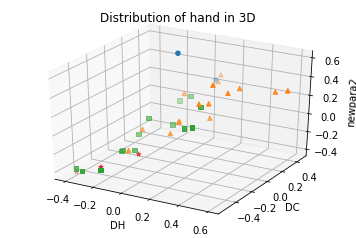

In [25]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

markers = ['o', '^', 's', '*']
for i in range(1,5):
    cls = df_norm[df_norm['Overall Hand'] == i]
    ax.scatter(cls['DH'], cls['DC'], cls['newpara2'], marker=markers[i-1])
    
ax.set_xlabel('DH')
ax.set_ylabel('DC')
ax.set_zlabel('newpara2')
ax.set_title('Distribution of hand in 3D')

# Discussion
While use 3 parameters, MLPClassifier predict all samples to label 2.
The reason of this problem may be there is even hard to draw a hyperplane manually. 

From the last 3D scatter, it can be seen that different class are interwined, so the best choice for algorithm to reduce loss is predict the class with most counts, that is label 2, which have 16 samples in 35 samples.

# Try only use DC and newpara2 and Plot Decision Boundary
Why choose DC and newpara2 first?

Because DC and newpara2 show more correlation between overall hand, which is already shown on the jointplot and boxplot above.

In [72]:
def Show_boundary(para1, para2, to_pred):
    """
    Args:
        para1: str, name for parameter in column
        para2: str, name for parameter in column
        to_pred: str, name for parameter to predict
    """
    # Fit
    X = df_norm[[para1, para2]]
    y = df_norm[to_pred]
    clf = MLPClassifier(solver='lbfgs',
                        alpha=1e-5,
                        learning_rate_init = 0.1,
                        hidden_layer_sizes=(5),
                        random_state=1)
    clf.fit(X, y)
    # Plot
    x_min, x_max = X[para1].min() - 1, X[para1].max() + 1
    y_min, y_max = X[para2].min() - 1, X[para2].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    fig, ax = plt.subplots()
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    ax.axis('on')

    # Plot also the training points
    markers = ['o', '^', 's', '*']
    for i in range(2,4):
        cls = df_norm[df_norm[to_pred] == i]
        plt.scatter(cls[para1], cls[para2], marker=markers[i-2], label=i)
    plt.legend()
    
    plt.title('Decision Boundary')

    # Evaluation
    pred = clf.predict(X)
    print("All predictions are: ", pred)
    print(classification_report(y, pred))

All predictions are:  [3 2 3 3 3 2 2 2 2 2 2 3 2 2 2 2 2 2 2 3 2 2 3 3 3 3 3 3 3 2]
             precision    recall  f1-score   support

          2       0.71      0.75      0.73        16
          3       0.69      0.64      0.67        14

avg / total       0.70      0.70      0.70        30



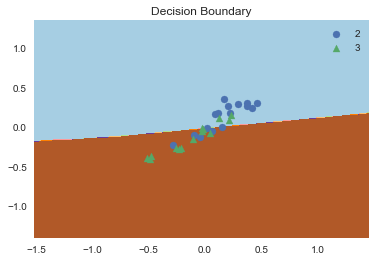

In [73]:
# Santiy Check
Show_boundary('DC', 'newpara2', 'Overall Hand')

All predictions are:  [3 2 3 3 3 2 2 2 2 2 2 3 2 2 2 2 2 2 2 3 2 3 3 3 3 3 2 3 3 2]
             precision    recall  f1-score   support

          2       0.71      0.75      0.73        16
          3       0.69      0.64      0.67        14

avg / total       0.70      0.70      0.70        30



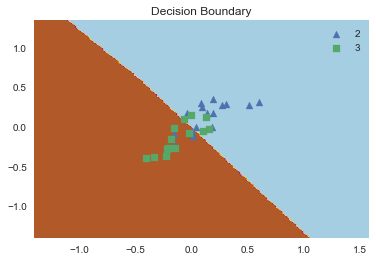

In [66]:
Show_boundary('DH', 'newpara2', 'Overall Hand')

All predictions are:  [3 2 3 3 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 3 2 3 3 3 3 3 2 3 3 2]
             precision    recall  f1-score   support

          2       0.72      0.81      0.76        16
          3       0.75      0.64      0.69        14

avg / total       0.74      0.73      0.73        30



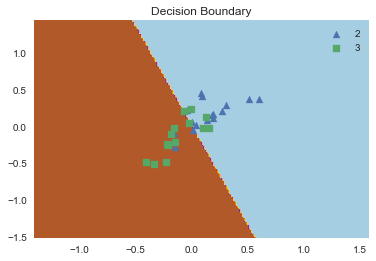

In [67]:
Show_boundary('DH', 'DC', 'Overall Hand')

# Discussion
Explanation for the results
